In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


palette = sns.color_palette(["#2176AB", "#F97662", "#FFBF00", "#50C878", "#B284BE"])
sns.set_palette(palette)

df = pd.read_csv('../../dataset/tables_columns_clean.csv')

df

,table_id,column_name,id_file
0,S3.T1,backbon,2404.12008v3
1,S3.T1,movielen,2404.12008v3
2,S3.T1,douban,2404.12008v3
3,S3.T1,globo,2404.12008v3
4,S5.T2,movielen,2404.12008v3
...,...,...,...
14648,S6.T3,pessimist|evalu,2410.13680v1
14649,A1.T4,request,2410.13680v1
14650,A1.T4,run,2410.13680v1
14651,A1.T4,relrequest,2410.13680v1


In [18]:
# some set theory operations, using Jaccard similarity find tables with similar columns

def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    if len(s1.union(s2)) == 0:
        return 0
    return len(s1.intersection(s2)) / len(s1.union(s2))


tables = df[['table_id', 'id_file']].drop_duplicates().values
table_similarity = []
for i in range(len(tables)):
    for j in range(i + 1, len(tables)):
        table1 = df[df['table_id'] == tables[i][0]]['column_name'].tolist()
        table2 = df[df['table_id'] == tables[j][0]]['column_name'].tolist()
        similarity = jaccard_similarity(table1, table2)
        table_similarity.append((tables[i][0], tables[j][0], similarity, tables[i][1], tables[j][1]))


In [19]:

table_similarity = pd.DataFrame(table_similarity, columns=['table1', 'table2', 'similarity','id_file1','id_file2'])
table_similarity = table_similarity[table_similarity['similarity'] > 0]
table_similarity['is_same_file'] = table_similarity['id_file1'] == table_similarity['id_file2']
table_similarity = table_similarity.sort_values(by='similarity', ascending=False)

table_similarity

,table1,table2,similarity,id_file1,id_file2,is_same_file
3076429,S4.T4,S4.T4,1.000000,2406.16106v1,2407.12223v3,False
3076528,S4.T4,S4.T4,1.000000,2406.16106v1,2407.14926v1,False
3076542,S4.T4,S4.T4,1.000000,2406.16106v1,2407.15462v2,False
551101,S5.T4,S5.T4,1.000000,2404.18301v1,2408.06201v1,False
3076574,S4.T4,S4.T4,1.000000,2406.16106v1,2407.18910v2,False
...,...,...,...,...,...,...
813463,S4.T2,A3.T12,0.001479,2405.02156v1,2406.07420v1,False
218307,S4.T2,A3.T12,0.001479,2404.14856v1,2406.07420v1,False
1385787,S4.T2,A3.T12,0.001479,2405.11764v2,2410.11972v1,False
219782,S4.T2,A3.T12,0.001479,2404.14856v1,2409.01012v1,False


In [20]:
# split the tables into two groups, same file and different files
same_file = table_similarity[table_similarity['is_same_file'] == True]
diff_file = table_similarity[table_similarity['is_same_file'] == False]

diff_file

,table1,table2,similarity,id_file1,id_file2,is_same_file
3076429,S4.T4,S4.T4,1.000000,2406.16106v1,2407.12223v3,False
3076528,S4.T4,S4.T4,1.000000,2406.16106v1,2407.14926v1,False
3076542,S4.T4,S4.T4,1.000000,2406.16106v1,2407.15462v2,False
551101,S5.T4,S5.T4,1.000000,2404.18301v1,2408.06201v1,False
3076574,S4.T4,S4.T4,1.000000,2406.16106v1,2407.18910v2,False
...,...,...,...,...,...,...
813463,S4.T2,A3.T12,0.001479,2405.02156v1,2406.07420v1,False
218307,S4.T2,A3.T12,0.001479,2404.14856v1,2406.07420v1,False
1385787,S4.T2,A3.T12,0.001479,2405.11764v2,2410.11972v1,False
219782,S4.T2,A3.T12,0.001479,2404.14856v1,2409.01012v1,False


In [21]:
# print best similar tables stats
best_similar_tables = diff_file.head(10)
best_similar_tables

,table1,table2,similarity,id_file1,id_file2,is_same_file
3076429,S4.T4,S4.T4,1.0,2406.16106v1,2407.12223v3,False
3076528,S4.T4,S4.T4,1.0,2406.16106v1,2407.14926v1,False
3076542,S4.T4,S4.T4,1.0,2406.16106v1,2407.15462v2,False
551101,S5.T4,S5.T4,1.0,2404.18301v1,2408.06201v1,False
3076574,S4.T4,S4.T4,1.0,2406.16106v1,2407.18910v2,False
4389423,S5.T2,S5.T2,1.0,2408.00855v3,2409.20052v1,False
61,S3.T1,S3.T1,1.0,2404.12008v3,2404.14774v2,False
64,S3.T1,S3.T1,1.0,2404.12008v3,2404.14851v3,False
1334985,S4.T3,S4.T3,1.0,2405.10979v2,2405.18276v1,False
1334991,S4.T3,S4.T3,1.0,2405.10979v2,2405.18941v1,False


In [22]:
#get the columns of the best similar tables
# key from (table1, id_file1) and (table2, id_file2)

for i, row in best_similar_tables.iterrows():
    
    table1 = df[(df['table_id'] == row['table1']) & (df['id_file'] == row['id_file1'])]['column_name'].tolist()
    table2 = df[(df['table_id'] == row['table2']) & (df['id_file'] == row['id_file2'])]['column_name'].tolist()
    
    #print intersection/union
    print(f'Jaccard Similarity: {row["similarity"]}')
    print(f'Table 1: {table1}')
    print(f'Table 2: {table2}')

Jaccard Similarity: 1.0
Table 1: ['model', 'auc', 'mrr', 'ndcg5', 'ndcg10']
Table 2: ['method', 'kuaishow', 'cikm16']
Jaccard Similarity: 1.0
Table 1: ['model', 'auc', 'mrr', 'ndcg5', 'ndcg10']
Table 2: ['metric', 'separ|llm|summari']
Jaccard Similarity: 1.0
Table 1: ['model', 'auc', 'mrr', 'ndcg5', 'ndcg10']
Table 2: ['method', 'hr1', 'hr5', 'hr10', 'hr50', 'hr100', 'latenc|ms']
Jaccard Similarity: 1.0
Table 1: ['variabl', 'type', 'differ', 'pvalu']
Table 2: ['pattern', 'match', 'match|exampl']
Jaccard Similarity: 1.0
Table 1: ['model', 'auc', 'mrr', 'ndcg5', 'ndcg10']
Table 2: ['dataset', 'user', 'item', 'interact', 'sparsiti']
Jaccard Similarity: 1.0
Table 1: ['method', 'haifashion']
Table 2: ['dataset', 'user', 'item', 'interact', 'densiti']
Jaccard Similarity: 1.0
Table 1: ['backbon', 'movielen', 'douban', 'globo']
Table 2: ['dataset', 'user', 'item', 'seqlen', 'averag', 'median']
Jaccard Similarity: 1.0
Table 1: ['backbon', 'movielen', 'douban', 'globo']
Table 2: ['model', 'docum

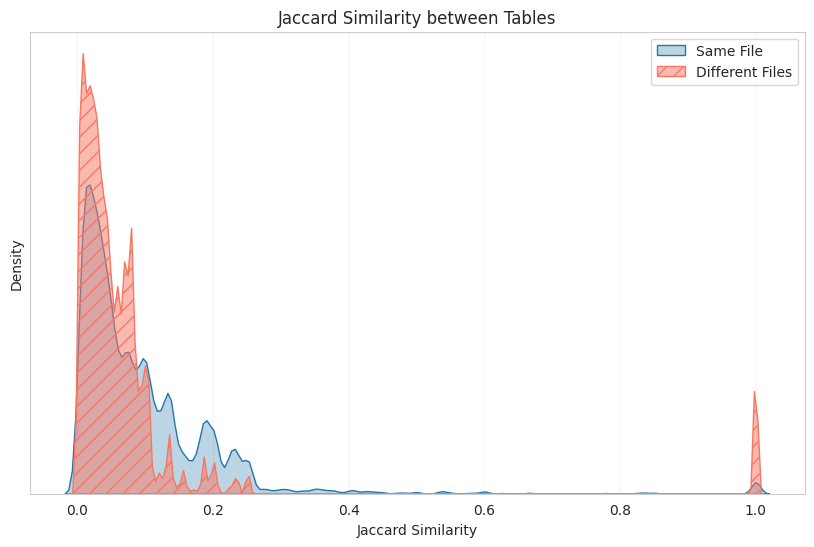

In [23]:
# plot the similarity between tables in the same file and different files
plt.figure(figsize=(10, 6))
sns.kdeplot(same_file['similarity'], color=palette[0], label='Same File', fill=True, bw_adjust=.35, alpha=0.3)
sns.kdeplot(diff_file['similarity'],  color=palette[1], label='Different Files', fill=True, bw_adjust=.35, alpha=0.5, hatch='//')
plt.xlabel('Jaccard Similarity')
plt.ylabel('Density')
plt.yticks([])
plt.title('Jaccard Similarity between Tables')
plt.grid(alpha=0.2)
plt.legend()
plt.savefig('output/jaccard_similarity.png', dpi=300)